FINAL

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df4 = pd.read_csv('../data_clean/filtered_dataset.csv')

# Drop rows where AQI is missing
df4.dropna(subset=["AQI"], inplace=True)

# --- Feature Engineering ---
# Convert Date to datetime
df4['Date'] = pd.to_datetime(df4['Date'], errors='coerce')

# Extract datetime features
df4['Year'] = df4['Date'].dt.year
df4['Month'] = df4['Date'].dt.month
df4['Day'] = df4['Date'].dt.day
df4['DayOfWeek'] = df4['Date'].dt.dayofweek

# Extract hour directly from string-based Time
df4['Hour'] = df4['Time'].apply(lambda x: int(str(x).split(':')[0]) if pd.notnull(x) else None)

# One-hot encode AQI_Bucket (instead of LabelEncoding)
df4 = pd.get_dummies(df4, columns=['AQI_Bucket'], drop_first=True)

# Label encode city
df4['City'] = LabelEncoder().fit_transform(df4['City'].astype(str))

# Drop unused columns
df4.drop(columns=['Date', 'Time', 'Datetime' , 'AQI_Bucket'], errors='ignore', inplace=True)

# Fill missing values with column means
df4.fillna(df4.mean(numeric_only=True), inplace=True)

# Check if rows exist now
print("✅ Final row count after cleaning:", len(df4))
if len(df4) == 0:
    raise ValueError("No rows left after cleaning. Please check data quality or input file.")

# Features and target
X4 = df4.drop(columns=["AQI"])
y4 = df4["AQI"]

# Final sanity check
assert not X4.isnull().any().any(), "X4 still contains NaNs!"
assert not y4.isnull().any(), "y4 still contains NaNs!"

# Train-test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

✅ Final row count after cleaning: 2547900


📊 Polynomial Regression Results:
🔹 Train Accuracy (R²): 0.8783061044128792
🔹 Test Accuracy (R²): 0.8787068074203245
🔹 MAE: 22.160917078396785
🔹 MSE: 1850.6088374118979
🔹 RMSE: 43.01870334414902


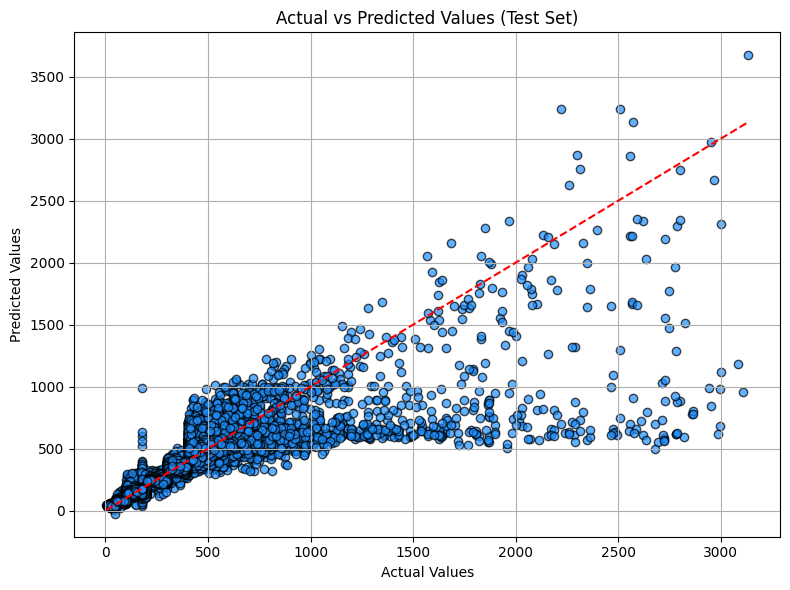

✅ Model saved as 'polynomial_regression_model.pkl'


In [3]:
import matplotlib.pyplot as plt
import joblib
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred = poly_model.predict(X4_train)
y4_test_pred = poly_model.predict(X4_test)

# Evaluation
print("📊 Polynomial Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred)))


# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()


# Save the trained model as a .pkl file
joblib.dump(poly_model, 'polynomial_regression_model.pkl')

print("✅ Model saved as 'polynomial_regression_model.pkl'")



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_rf = rf_model.predict(X4_train)
y4_test_pred_rf = rf_model.predict(X4_test)

# Evaluation
print("📊 Random Forest Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_rf))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_rf))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_rf))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_rf))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_rf)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_rf, color='forestgreen', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Model saved as 'random_forest_model.pkl'")


KeyboardInterrupt: 

📊 Random Forest (Tuned for Less Overfitting):
🔹 Train R²: 0.9140228387820747
🔹 Test R²: 0.9116896835174565
🔹 MAE: 18.30134823199666
🔹 MSE: 1347.3786009044443
🔹 RMSE: 36.70665608448206


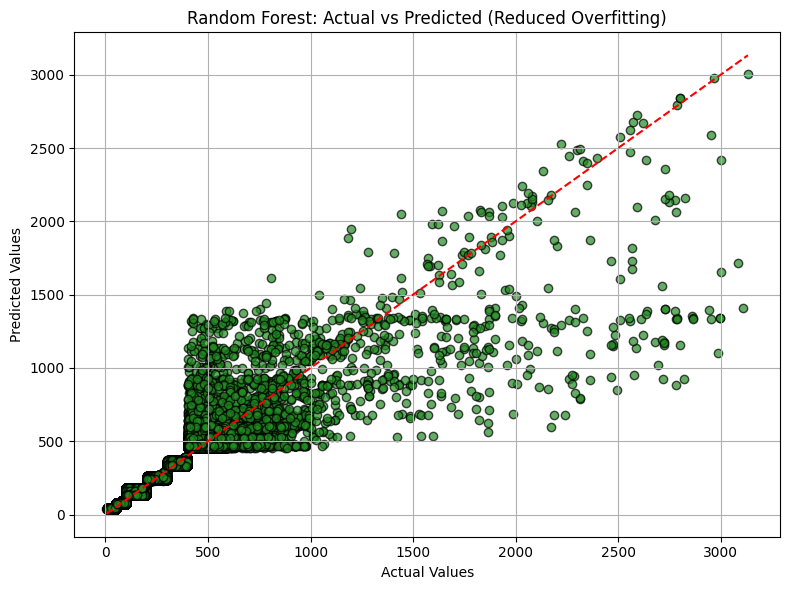

✅ Tuned model saved as 'random_forest_model.pkl'


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ Control model complexity
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,               # Limit depth of trees
    min_samples_split=10,       # Require more samples to split
    random_state=42
)
rf_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_rf = rf_model.predict(X4_train)
y4_test_pred_rf = rf_model.predict(X4_test)

# Evaluation
print("📊 Random Forest (Tuned for Less Overfitting):")
print("🔹 Train R²:", r2_score(y4_train, y4_train_pred_rf))
print("🔹 Test R²:", r2_score(y4_test, y4_test_pred_rf))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_rf))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_rf))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_rf)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_rf, color='forestgreen', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted (Reduced Overfitting)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Tuned model saved as 'random_forest_model.pkl'")

📊 XGBoost Regression Results:
🔹 Train Accuracy (R²): 0.9304024402018181
🔹 Test Accuracy (R²): 0.9278644695471244
🔹 MAE: 17.19439412708193
🔹 MSE: 1100.5947432688458
🔹 RMSE: 33.1752127840779


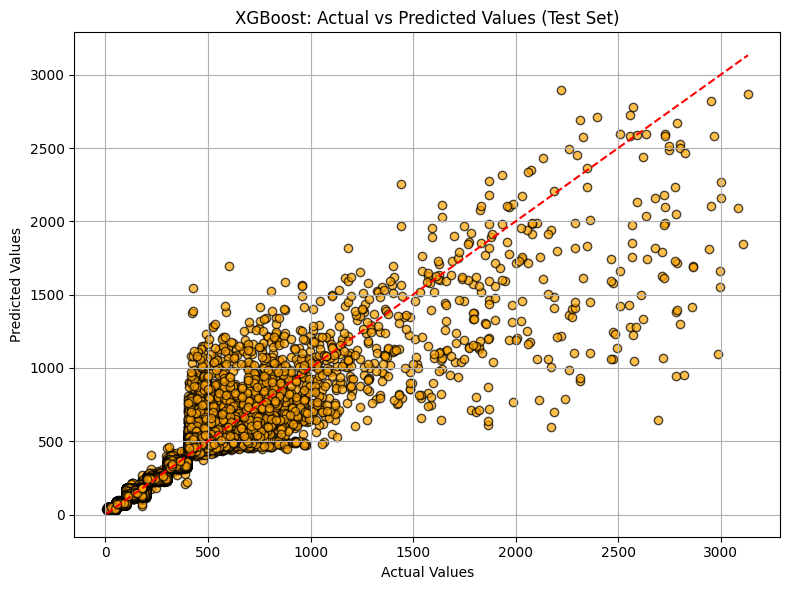

✅ Model saved as 'xgboost_model.pkl'


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_xgb = xgb_model.predict(X4_train)
y4_test_pred_xgb = xgb_model.predict(X4_test)

# Evaluation
print("📊 XGBoost Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_xgb))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_xgb))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_xgb))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_xgb))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_xgb)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_xgb, color='orange', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("✅ Model saved as 'xgboost_model.pkl'")


📊 Linear Regression Results:
🔹 Train Accuracy (R²): 0.8581988203359009
🔹 Test Accuracy (R²): 0.8585053714667878
🔹 MAE: 24.129158240076098
🔹 MSE: 2158.8285743065935
🔹 RMSE: 46.46319591145871


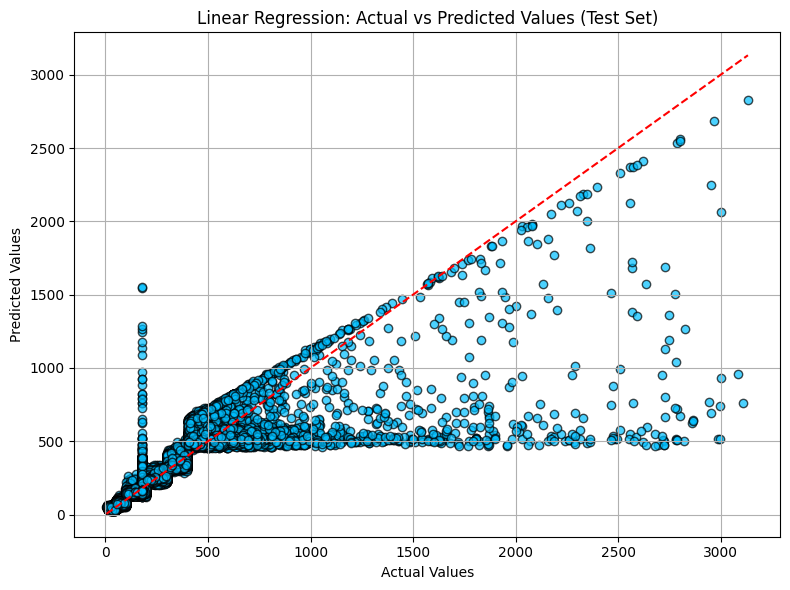

✅ Model saved as 'linear_regression_model.pkl'


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_lin = linreg_model.predict(X4_train)
y4_test_pred_lin = linreg_model.predict(X4_test)

# Evaluation
print("📊 Linear Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_lin))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_lin))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_lin))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_lin))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_lin)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_lin, color='deepskyblue', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(linreg_model, 'linear_regression_model.pkl')
print("✅ Model saved as 'linear_regression_model.pkl'")


📊 Lasso Regression Results:
🔹 Train Accuracy (R²): 0.8578126035636554
🔹 Test Accuracy (R²): 0.8580785215360508
🔹 MAE: 24.174824376536463
🔹 MSE: 2165.341159533105
🔹 RMSE: 46.53322640364737


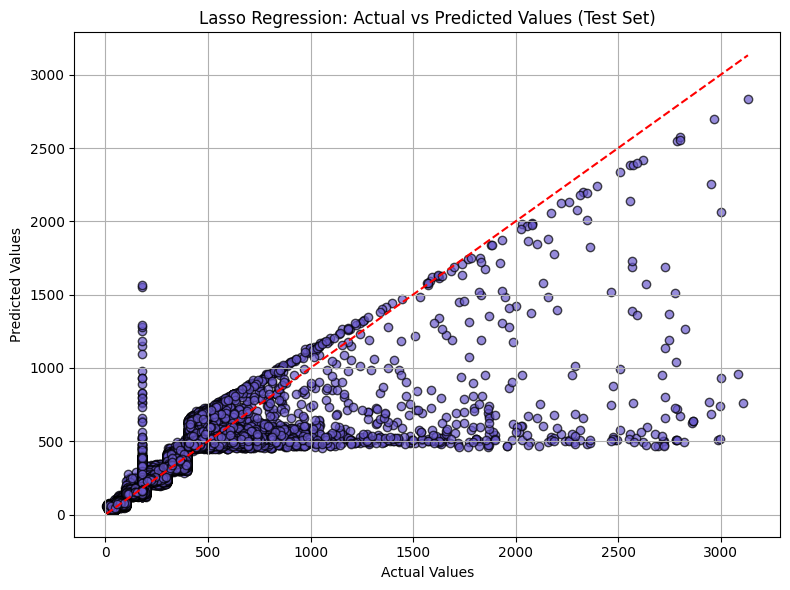

✅ Model saved as 'lasso_regression_model.pkl'


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_lasso = lasso_model.predict(X4_train)
y4_test_pred_lasso = lasso_model.predict(X4_test)

# Evaluation
print("📊 Lasso Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_lasso))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_lasso))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_lasso))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_lasso))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_lasso)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_lasso, color='slateblue', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Lasso Regression: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(lasso_model, 'lasso_regression_model.pkl')
print("✅ Model saved as 'lasso_regression_model.pkl'")
